In [1]:
import sys
import time

import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc

from IPython.display import HTML

sys.path.append('./../lib')
from intertrain import Intertrain
from solver import Solver

In [2]:
# SDE parameters : f = A x, df / dx = A (dimension = 1)

A = 1.

def func_f(x):
    return A*x

def func_f_der(x):
    return A*np.ones(x.shape)

def func_r0(x):
    s = 1.0
    m = 0.
    r = 1./np.sqrt(2.*np.pi * s**2)
    r*= np.exp(-1. * (x-m)**2 / 2. / s**2)
    return r.reshape(-1)

In [3]:
SL = Solver(d=1, with_tt=False)
SL.set_grid_t(100)
SL.set_grid_x(10)
SL.set_funcs(func_f, func_f_der, func_r0)

In [4]:
SL.prep()
SL.calc()

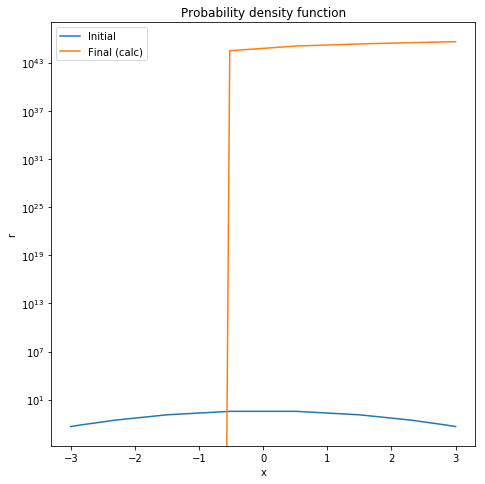

In [5]:
# Plot distribution (initial and final) on the spatial grid

fig = plt.figure(figsize=(6, 6))
gs = mpl.gridspec.GridSpec(
    ncols=1, nrows=1, left=0.01, right=0.99, top=0.99, bottom=0.01,
    wspace=0.4, hspace=0.3, width_ratios=[1], height_ratios=[1]
)

Xg = SL.IT.grid()
x0 = Xg.reshape(-1)
r1 = SL.IT1.calc(Xg).reshape(-1)
r2 = SL.IT2.calc(Xg).reshape(-1)
ax = fig.add_subplot(gs[0, 0])
ax.plot(x0, r1, label='Initial')
ax.plot(x0, r2, label='Final (calc)')
ax.semilogy()
ax.set_title('Probability density function')
ax.set_xlabel('x')
ax.set_ylabel('r')
ax.legend(loc='best')

plt.show()

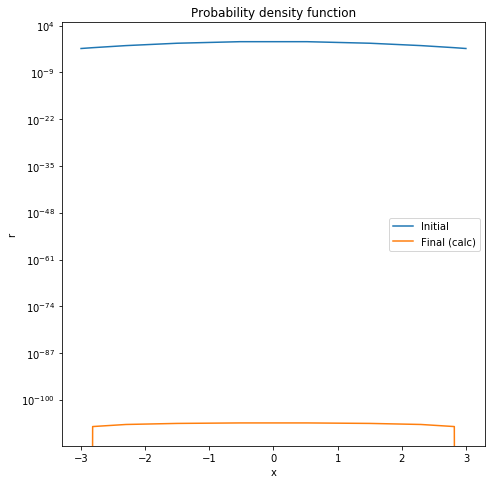